### 4. Median of Two Sorted Arrays

In [ ]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        A, B = nums1, nums2
        total = len(A) + len(B)
        half = total//2

        if len(A) > len(B):
            A, B = B, A

        left, right = 0, len(A)-1
        while True:
            i = (left + right)//2
            j = half - i - 2

            print(f'{A[:i+1]}  {B[:j+1]}')

            Aleft = A[i] if i >= 0 else float("-infinity")
            Aright = A[i+1] if (i+1) < len(A) else float("infinity")
            Bleft = B[j] if j >= 0 else float("-infinity")
            Bright = B[j+1] if (j+1) < len(B) else float("infinity")

            if Aleft <= Bright and Bleft <= Aright:
                if total % 2 == 1:
                    return min(Aright, Bright)
                return (max(Aleft, Bleft) + min(Aright, Bright)) / 2
            
            elif Aleft > Bright:
                right = i-1
            
            else:
                left = i+1

- Unfortunately, I was unable to come up with the solution to this problem on my own, so I had to look up the solution provided by Neetcode.
- How it works is that we try to find a partition of the left half of the merged list consisting of `num1` and `num2`.
- Further, it has to satisfy the condition that the rightmost element of each of the two parts has to be less or equal to the first element to the right of the other part.
- We achieve this with a binary search through the smaller of the two lists, called `A`.

### 33. Search in Rotated Sorted Array

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target)

- I solved this problem with a **Binary search** that considers four distinct cases for deciding whether to continue searching in the left or the right sublist. The cases have been added as comments in the solution.

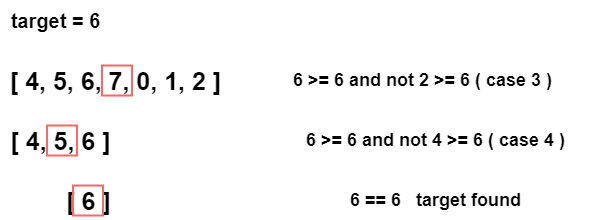

### 74. Search a 2D Matrix

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> bool:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return True
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return False

    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        nums = list(itertools.chain.from_iterable(matrix))
        return self.bin(nums, 0, len(nums)-1, target)

- I solved this problem with a **Binary search** over a flattened version of the given `matrix`.

### 81. Search in Rotated Sorted Array II

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:
        # have to search unique values in nums
        nums = sorted(list(set(nums)))

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target) != -1

- The only two ways in which this problem differs from its predecessor are that it expects a boolean value whether the `target` exists in the given list `nums`, and that the values are not unique.
- Therefore, I slightly modified my solution to transform `nums` into a list containing only unique values, and instead of returning the actual index of the `target`, I return `True` if the value exists in `nums`, and `False`, otherwise.

### 153. Find Minimum in Rotated Sorted Array

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, min: int) -> int:
        if l <= r:
            middle = l + (r-l)//2

            #print(f'l = {l}  r = {r}  m = {middle}  nums[m] = {nums[middle]}')

            if nums[r] < nums[middle-1]:
                #print(f'{nums[r]} < {nums[middle-1]}')
                if nums[middle] < min:
                    min = nums[middle]
                return self.bin(nums, middle+1, r, min)
            elif nums[r] >= nums[middle-1]:
                #print(f'{nums[r]} >= {nums[middle-1]}')
                if nums[middle] < min:
                    min = nums[middle]
                return self.bin(nums, l, middle-1, min)
        else:
            return min

    def findMin(self, nums: List[int]) -> int:
        if len(nums) < 3:
            return min(nums)
        return self.bin(nums, 0, len(nums)-1, 5000)

- With this solution, I was able to reduce the runtime complexity to O(log n), as the task expected.
- Unfortunately, it only works for inputs with a length greater than 2, which is why I return `min(nums)` if `nums` contains 2 or fewer elements.
- The way it works is that we choose between the left and right subarrays based on the condition that the topmost element in that subarray should be less than the topmost element in the other subarray.
- Throughout this process, we keep track of the minimum value with the variable `min` and return that after the binary search has been completed.

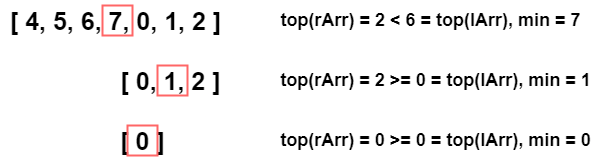

### 704. Binary Search

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return middle
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return -1

    def search(self, nums: List[int], target: int) -> int:
        return self.bin(nums, 0, len(nums)-1, target)

- The solution to this problem was quite simple.
- The way it works is that we define a recursive function `bin`, that will perform a binary search on `nums` and return the index of `target` if it gets found and `-1` otherwise.

### 875. Koko Eating Bananas

In [ ]:
class Solution:
    def getHours(self, k: int, piles: List[int]) -> int:
        h = 0
        for pile in piles:
            h += math.ceil(pile/k)
        return h

    def bin(self, piles: List[int], l: int, r: int, target: int, maxK: tuple[int, int]) -> int:
        if l <= r:
            middle = l + (r-l)//2
            k = middle+1
            hours = self.getHours(k, piles)
            #print(f'l = {l}  r = {r}  k = {k}  getHours({k}) = {hours}')

            if hours == target:
                while k > 1 and self.getHours(k-1, piles) == target:
                    k -= 1
                return k
            elif hours < target:
                if hours > maxK[1]:
                    maxK[1] = hours
                    maxK[0] = k
                return self.bin(piles, l, middle-1, target, maxK)
            elif hours > target:
                return self.bin(piles, middle+1, r, target, maxK)
        else:
            return maxK[0]

    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        k = self.bin(piles, 0, max(piles)-1, h, [0,0])
        return k

- This problem was a little tricky to figure out, but fortunately I did get to the solution after some failed attempts.
- The way it works is that we perform a binary search for `h` in the list of all possible values for `k`, which will be an index list starting with `1` and ending with the value of the largest `pile`.
- When we find `k`, whose hours match the given hours `h`, we have to decrease `k` until there is no smaller `k`, whose hours also match `h`.
- Lastly, we also have to keep track of the value `k` with the largest number of `hours` that are still within our target `h`, and return that in our binary search if the exact target `h` can't be found.

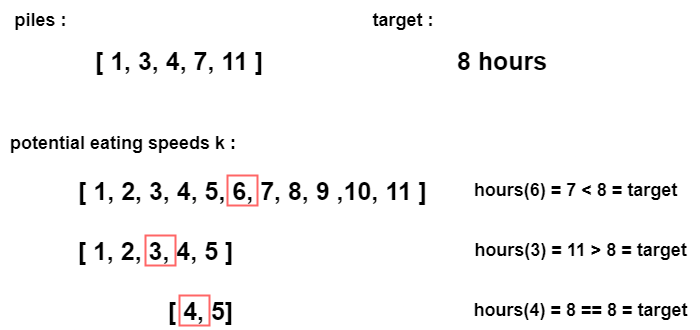

### 981. Time Based Key-Value Store

In [ ]:
class TimeMap:
    def __init__(self):
        self.map = defaultdict(list)
        

    def set(self, key: str, value: str, timestamp: int) -> None:
        if len(self.map[key]) == 0:
            self.map[key].append([value, timestamp])
        else: 
            bisect.insort(self.map[key], [value, timestamp], key=lambda x: x[1])
        #print(dict(self.map))


    def get(self, key: str, timestamp: int) -> str:
        def binS(vals: List, l: int, r: int, target: int, maxT: List) -> str:
            if l <= r:
                m = l + (r-l)//2
                #print(f't = {target}  l = {l}  r = {r}  m = {m}  vals[m] = {vals[m]}')

                if vals[m][1] == target:
                    return vals[m][0]
                elif vals[m][1] < target:
                    if vals[m][1] > maxT[1]:
                        maxT[1] = vals[m][1]
                        maxT[0] = vals[m][0]
                    return binS(vals, m+1, r, target, maxT)
                elif vals[m][1] > target:
                    return binS(vals, l, m-1, target, maxT)
            else: 
                return maxT[0]

        if not key in self.map.keys():
            return ""
        vals = self.map[key]
        return binS(vals, 0, len(self.map[key])-1, timestamp, ["", 0])


        
# Your TimeMap object will be instantiated and called as such:
# obj = TimeMap()
# obj.set(key,value,timestamp)
# param_2 = obj.get(key,timestamp)

- The solution to this problem was quite straightforward, and both the `set` and `get` operations have a runtime complexity of O(log(n)).
- How it works is that we keep a sorted list of `values` and their `timestamps` for every key. These are stored in the dictionary `self.map`.
- Whenever we `set` a value, we use `bisect.insort` to insert the value into its respective list while keeping the list sorted.
- When the `get` method is called, we perform a simple binary search to find the value with the appropriate `timestamp`.

### 2366. Minimum Replacements to Sort the Array

In [ ]:
class Solution:
    def minimumReplacement(self, nums: List[int]) -> int:

        def maximumSplit(num: int, target: int):
            """
            Returns the largest number 'n' such that all parts of 'num', split up 'n' times, are less or equal to 'target'.
            It also returns the smallest one of these parts, which will become the upper boundary for the next iteration in the main loop.
            """
            def binSearch(l,r,target):
                if l <= r:
                    m = l + (r-l)//2
                    if math.ceil(num/m) <= target:
                        return binSearch(l, m-1, target)
                    else:
                        return binSearch(m+1, r, target)
                else:
                    return r
            splits = binSearch(1, num, target)
            smallest_part = num // (splits+1)
            return smallest_part, splits


        i, prev = len(nums)-2, nums[len(nums)-1]
        count = 0
        while i >= 0:
            if nums[i] > prev:
                leftmost_element, splits = maximumSplit(nums[i], prev)
                count += splits
                prev = leftmost_element
            else:
                prev = nums[i]
            i -= 1

        return count

- We iterate through `nums`, starting at the second to last element, and compare the current element to it's right neighbor in every iteration.
- If the current element is greater than its right neighbor, we use the helper function `maximumSplits` to calculate the smallest number of times we can split up the current number such that all parts are less than or equal to the right neighbor.
- We call this number `splits`, and we also gather the exact element that will be leftmost after splitting the current number `splits` times and call it `leftmost_element`.
- In the following iteration, we will compare the current number to this `leftmost_element`.

### 2616. Minimize the Maximum Difference of Pairs

In [ ]:
class Solution:
    def minimizeMax(self, nums: List[int], p: int) -> int:
        # we need to sort nums for everything below to work
        nums.sort()

        # how many pairs with a difference less or equal to diff are there in nums
        def validPairs(diff: int):
            i, pairs = 0,0
            while i < len(nums)-1:
                if nums[i+1] - nums[i] <= diff:
                    pairs += 1
                    i += 1
                i += 1
            return pairs

        # we find the smallest possible upper boundary for the difference such that there are p pairs with that maximum difference
        def binSearch(l: int, r: int, target: int):
            if l <= r:
                m = l + (r-l)//2

                if validPairs(m) >= target:
                    return binSearch(l, m-1, target)
                elif validPairs(m) < target:
                    return binSearch(m+1, r, target)
            else:
                return l

        # search space between 0 and greatest possible difference: rightmost(largest) - leftmost(smallest)
        return binSearch(0, nums[-1]-nums[0], p)

- To understand how it works, we first need to know that we can easily find the number of `pairs` for a **concrete maximum difference** via the helper function `validPairs()` when `nums` has been sorted beforehand.
- What is left to do then is to perform a binary search over **all possible maximum differences** and find the **smallest maximum difference** that satisfies the condition that there are `p` pairs for this **maximum difference** in `nums`.

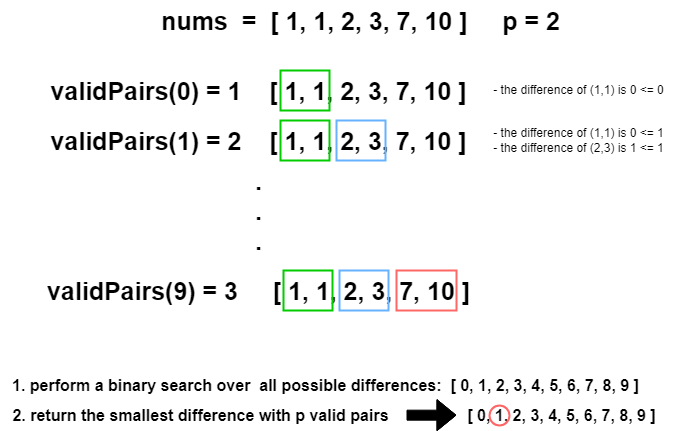